Connect to python API

In [83]:
%matplotlib inline

In [84]:
import json
config = {}
with open('config.json') as data_file:    
    config = json.load(data_file)


In [114]:
import twitter

# XXX: Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://dev.twitter.com/docs/auth/oauth for more information 
# on Twitter's OAuth implementation.

CONSUMER_KEY = config['twitter']['CONSUMER_KEY']
CONSUMER_SECRET = config['twitter']['CONSUMER_SECRET']
OAUTH_TOKEN = config['twitter']['OAUTH_TOKEN']
OAUTH_TOKEN_SECRET = config['twitter']['OAUTH_TOKEN_SECRET']


auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

Get US and World Trends

In [86]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
NYS_WOE_ID = 2459115
TX_WOE_ID = 2347602
UK_WOE_ID = 23424975


# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.
trends = []

trends.append(twitter_api.trends.place(_id=US_WOE_ID)) #twitter_api.trends.place(_id=WORLD_WOE_ID)
trends.append(twitter_api.trends.place(_id=UK_WOE_ID)) #twitter_api.trends.place(_id=US_WOE_ID)

In [115]:
import json

#print json.dumps(trends[0], indent=1)
#print
#print json.dumps(trends[1], indent=1)

In [122]:
trend_set = []

trend_set.append(set([trend['name'] 
                        for trend in trends[0][0]['trends']]))

trend_set.append(set([trend['name'] 
                     for trend in trends[1][0]['trends']]))

common_trends = trend_set[0].intersection(trend_set[1])

trends_subtract = trend_set[1] - trend_set[0]

print "Trend 1: \n" , trend_set[0]
print "Trend 2: \n" , trend_set[1]

print "\n{} common trends: \n".format(len(common_trends)), common_trends

Trend 1: 
set([u'Kongbo', u'#BYUNSD16', u'Jeffery Simmons', u'#MeBeforeYou', u'#SOTS16', u'Ahmmon Richards', u'Jim Harbaugh', u'#MillennialBillOfRights', u'Broccoli City', u'#SantosDC', u'Lou Holtz', u'#digitalequity', u'#MyBigGameRitual', u'Quinn Nordin', u'#BetterWaysToElectPOTUS', u'Scion', u'Please Clap', u'#pmux', u'#HoosRising', u'#bufferchat', u'#NGWSD', u'#Auburn', u'Rand Paul', u'Cam Cameron', u'#NationalSigningDay', u'Brandon Marshall', u'#ThisOneTimeInRP', u'#MosqueVisit', u'#nwpd', u'#Tribe16', u'Kristian Fulton', u'#UberPuppyBowl', u'#WinterSurvival', u'#BigKap', u'#CashewCraze', u'#HookEm', u'Nobel Peace Prize', u'#BCFest2016', u'Robert Durst', u'#WineWednesday', u'#tecsig', u'#NSD2016', u'#AdnanSyed', u'#RivalsNSD', u'#Pit2Pub', u'David Lee', u'Bob Elliott', u'Shavar Manuel', u'#WhatIsLove', u'#Ask5SOSAsia'])
Trend 2: 
set([u'#MostActiveCity', u'#5YearsOfHemmo1996', u'#ESHustings', u'#Plebgate', u'Robot Wars', u'#semrushchat', u'Lord Lawson', u'Aleppo', u'#Pit2Pub', u'#D

In [123]:
queries = list(trend_set[0]) + list(trend_set[1])
print len(queries)

100


In [90]:
# Import unquote to prevent url encoding errors in next_results
from urllib import unquote

# XXX: Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

#queries = list(common_trends)



count = 500

trend_tweets = {}

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets

for q in queries:
    print "fetching {}".format(q)
    
    search_results = twitter_api.search.tweets(q=q, count=count)

    statuses = search_results['statuses']


    numberOfTweets = 100
    fetchIterations = numberOfTweets/count

    for _ in range(fetchIterations):
        print "Length of statuses {} for {}".format(len(statuses), q)
        try:
            next_results = search_results['search_metadata']['next_results']
        except KeyError, e: # No more results when next_results doesn't exist
            break

        # Create a dictionary from next_results, which has the following form:
        # ?max_id=313519052523986943&q=NCAA&include_entities=1
        kwargs = dict([kv.split('=') for kv in unquote(next_results[1:]).split("&") ])    


        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']

    trend_tweets[q] = statuses


fetching Kongbo
fetching #BYUNSD16
fetching Jeffery Simmons
fetching #MeBeforeYou
fetching #SOTS16
fetching Ahmmon Richards
fetching Jim Harbaugh
fetching #MillennialBillOfRights
fetching Broccoli City
fetching #SantosDC
fetching Lou Holtz
fetching #digitalequity
fetching #MyBigGameRitual
fetching Quinn Nordin
fetching #BetterWaysToElectPOTUS
fetching Scion
fetching Please Clap
fetching #pmux
fetching #HoosRising
fetching #bufferchat
fetching #NGWSD
fetching #Auburn
fetching Rand Paul
fetching Cam Cameron
fetching #NationalSigningDay
fetching Brandon Marshall
fetching #ThisOneTimeInRP
fetching #MosqueVisit
fetching #nwpd
fetching #Tribe16
fetching Kristian Fulton
fetching #UberPuppyBowl
fetching #WinterSurvival
fetching #BigKap
fetching #CashewCraze
fetching #HookEm
fetching Nobel Peace Prize
fetching #BCFest2016
fetching Robert Durst
fetching #WineWednesday
fetching #tecsig
fetching #NSD2016
fetching #AdnanSyed
fetching #RivalsNSD
fetching #Pit2Pub
fetching David Lee
fetching Bob Elli

In [91]:
import re
tweetText = trend_tweets[queries[0]][0]['text']
print tweetText
urlRegEx = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
noUrl = re.sub(urlRegEx, '', tweetText)
print 'nourl', noUrl

print len(queries), len(trend_tweets.keys())
print trend_tweets[queries[0]][0]['lang']
print json.dumps(trend_tweets[queries[0]][0], indent=1)



RT @GoVols247: Butch Jones on #Vols signing nation’s No. 1 JUCO prospect, DE Jonathan Kongbo: “Our defense just got a whole lot better."
nourl RT @GoVols247: Butch Jones on #Vols signing nation’s No. 1 JUCO prospect, DE Jonathan Kongbo: “Our defense just got a whole lot better."
100 93
en
{
 "contributors": null, 
 "truncated": false, 
 "text": "RT @GoVols247: Butch Jones on #Vols signing nation\u2019s No. 1 JUCO prospect, DE Jonathan Kongbo: \u201cOur defense just got a whole lot better.\"", 
 "is_quote_status": false, 
 "in_reply_to_status_id": null, 
 "id": 694952108752240642, 
 "favorite_count": 0, 
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>", 
 "retweeted": false, 
 "coordinates": null, 
 "entities": {
  "symbols": [], 
  "user_mentions": [
   {
    "id": 257825311, 
    "indices": [
     3, 
     13
    ], 
    "id_str": "257825311", 
    "screen_name": "GoVols247", 
    "name": "GoVols247"
   }
  ], 
  "hashtags": [
   {


In [92]:
#print trend_tweets.keys()
import itertools

concatinatedText = {}
noUrlText = {}

urlRegEx = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
noUrl = re.sub(urlRegEx, '', tweetText)


for trend in trend_tweets.keys():
    tweet_list = trend_tweets[trend]
    #print tweet_list[0]
    #only english tweets
    concatinatedText[trend] = ''.join([ status['text'] if status['lang']=='en' else ''
                                for status in tweet_list])
    
    noUrlText[trend] = ''.join([ re.sub(urlRegEx, '', status['text']) if status['lang']=='en' else ''
                                for status in tweet_list])
    

print len(trend_tweets.keys())
#print concatinatedText['#SocialismChecklist']

93


In [102]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, stop_words = 'english',\
strip_accents = 'unicode', lowercase=True, ngram_range=(1,2),\
norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
# X is a sparce martrix. each row containes the tfidfs for a trend.
X = vectorizer.fit_transform(noUrlText.values())
D = -(X * X.T).todense() # dot products
XX = X.todense()
#print D
print XX # dense matrix

countVectorizer = CountVectorizer(stop_words = 'english',\
strip_accents = 'unicode', lowercase=True)
CX = countVectorizer.fit_transform(noUrlText.values())




[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.01125399 ...,  0.          0.          0.        ]]


In [126]:
import numpy as np

indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 100
top_features = [features[i] for i in indices[:top_n]]
#print '\n Top {} words normalized by document frequency'.format(top_n)
#print top_features
#freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
#print sorted (freqs, key = lambda x: -x[1])

features = countVectorizer.get_feature_names()
top_n = 100
top_features = [features[i] for i in indices[:top_n]]
#print '\n Top {} words'.format(top_n)
#print top_features

freqs = [(word, CX.getcol(idx).sum()) for word, idx in countVectorizer.vocabulary_.items()]
#sort from largest to smallest
print '\n Top words by count'
top_words = sorted (freqs, key = lambda x: -x[1])
print top_words[0:100]


 Top words by count
[(u'rt', 3995), (u'amp', 449), (u'https', 394), (u'tonight', 300), (u'new', 293), (u'day', 262), (u'like', 231), (u'harbaugh', 223), (u'chop', 222), (u'just', 219), (u'great', 208), (u'jim', 200), (u'nsd2016', 200), (u'holtz', 188), (u'today', 179), (u'commits', 175), (u'says', 174), (u'2016', 168), (u'tribe16', 164), (u'dab', 163), (u'don', 162), (u'lsu', 162), (u'lou', 160), (u'nationalsigningday', 158), (u'star', 158), (u'fsu', 158), (u'want', 156), (u'manuel', 150), (u'shavar', 148), (u'bob', 147), (u'good', 141), (u'women', 139), (u'lord', 138), (u'michigan', 137), (u'signing', 137), (u'fsu_football', 125), (u'sports', 125), (u'time', 122), (u'love', 122), (u'game', 122), (u've', 119), (u'ahmmon', 118), (u'work', 118), (u'central', 117), (u'peace', 117), (u'news', 117), (u'city', 115), (u'state', 115), (u'david', 114), (u'mebeforeyou', 114), (u'george', 112), (u'video', 112), (u'paul', 112), (u'robert', 111), (u'glasgow', 110), (u'mosque', 110), (u'wait', 110)

In [95]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
coords = model.fit_transform(XX) 
print coords


[[ 101.34146792  -80.32297254]
 [ -22.50238934    2.42902572]
 [  41.69684691  -53.00749132]
 [  54.60567293   -3.48968243]
 [  -4.84791503   -7.60219193]
 [-148.56097916    9.40097957]
 [ 146.38344026  -60.13951266]
 [  43.49017589   57.52758633]
 [ 170.2795269   -98.10114316]
 [  -6.1339339   -75.0729391 ]
 [  -3.38529894  -86.41649589]
 [  78.81747707  -99.37160563]
 [-148.44217547   71.00026154]
 [  15.20823394   27.15804047]
 [ -28.25801759   19.89922012]
 [  65.41453054  -46.35377534]
 [  24.29805893  -88.84319901]
 [  20.13914933   98.47906367]
 [ -29.43990333  -19.28826799]
 [ -48.87585922  -16.79099637]
 [ -87.30516983   49.6713249 ]
 [  36.20744987  -31.22683376]
 [  85.37206808  -19.40479773]
 [ -64.55715588   70.42085763]
 [   4.79844241  -48.58254533]
 [  -4.03220178   59.10982777]
 [ -44.8727226    33.1304296 ]
 [  56.06529298   19.14032449]
 [  93.78384962   78.24842806]
 [ -54.0881133   -72.74315261]
 [ -10.24362974  -29.03708371]
 [ 103.31123922  -25.63523077]
 [-118.6

In [96]:
#import matplotlib.pyplot as plt

vis_x = coords[:, 0]
vis_y = coords[:, 1]


93 93


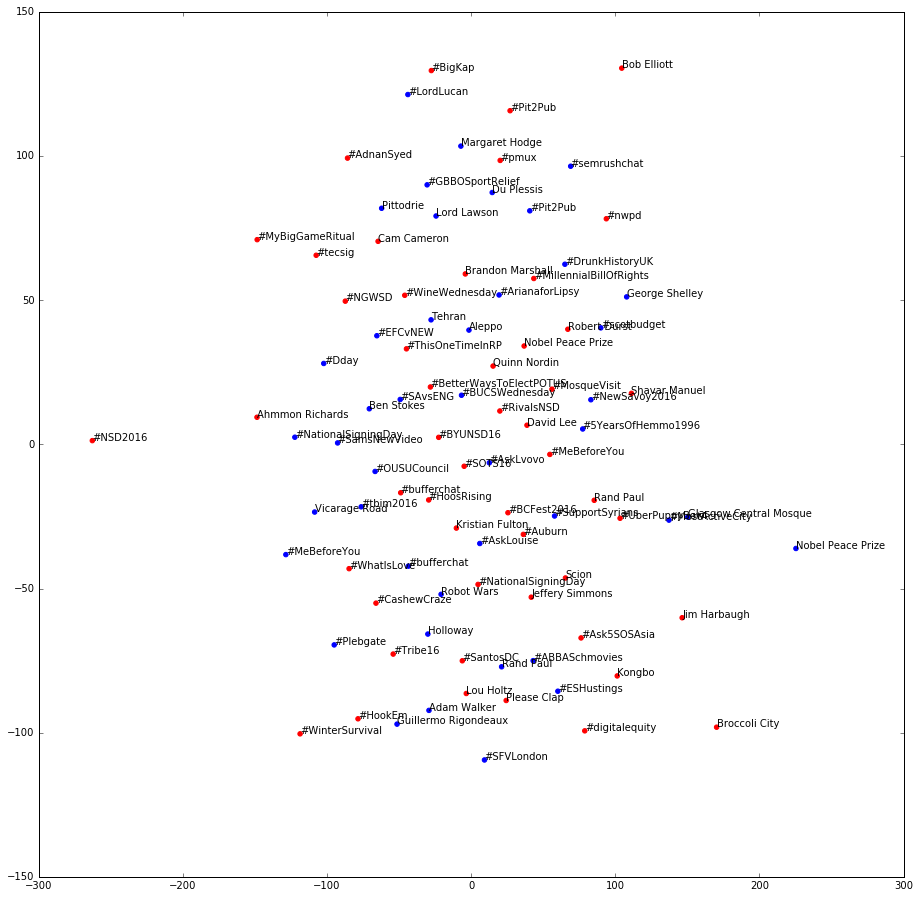

In [99]:
import matplotlib.pyplot as plt

color = ['#FF0000'] * 50 + ['#0000FF'] * len(list(trends_subtract))


print len(vis_x), len(color)

plt.scatter(vis_x, vis_y, color=color)

for i, txt in enumerate(queries):
    if i<len(vis_x): plt.annotate(txt, (vis_x[i],vis_y[i]))

fig = plt.gcf()
fig.set_size_inches(15.5, 15.5)

plt.show()

